# Reinforcement Learning - Taxi-v3

## Abstract

Reinforcement Learning is a type of Machine learning where an agent learns from its environment and takes appropriate actions from a state and earns rewards accordingly. Here we are taking an example environment called Taxi-v3 from the OpenAI gym platform to see how QLearning algorithm, which is one of the RL algorithms, can be used by the agent(Taxi) to achieve its goal. Objective of this game is to pick up a passenger from one of the 4 possible locations and drop him off at another as fast as possible. We aim to achieve the optimized Reinforcement learning algorithm for the agent using QLearning

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("/gym")
import gym
import random
import matplotlib.pyplot as plt
from IPython.display import Image

## Creating environment

In [2]:
env=gym.make("Taxi-v3")

In [3]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



- '|' represent walls which cannot be crossed and the taxi can pass through ':' to reach the destination

In [4]:
action_size=env.action_space.n
state_size=env.observation_space.n
print("action_size is ",action_size)
print("state_size is ",state_size)


action_size is  6
state_size is  500


#### Initializing QTable

In [5]:
qtable=np.zeros((state_size,action_size))
qtable

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

#### Q learning algorithm - lets train the agent 

In [6]:
def QLearning(env, learning_rate, gamma, epsilon, min_epsilon, max_epsilon, decay_rate, max_steps, total_episodes):
    # List of rewards 
    rewards = []
    rewards_copy = []
    average_rewards = []
    steps = []
    # Until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step=0
        done = False
        total_rewards = 0

        for step in range(max_steps):
            # randomize a number for the exploration-exploitation trade-off
            exp_exp_tradeoff = random.uniform(0, 1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else exploration (random choice of action)
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Updating the Qvalue of current state-action pair using the bellman equation
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

            # Our new state is state
            state = new_state

            # Update rewards
            total_rewards += reward

            if done:
                steps.append(step)
                rewards.append(total_rewards)
                rewards_copy.append(total_rewards)
                #print ("Score", total_rewards)
                break
            state = new_state

        # Reduce epsilon 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
        
        # Finding the average rewards per 100 episodes
        if (episode+1) % 100 == 0:
                average_reward = np.mean(rewards)
                average_rewards.append(average_reward)
                rewards = []

        if (episode+1) % 100 == 0:    
                print('Episode {} Average Reward: {}'.format(episode+1, average_reward))

    env.close()
    print ("Score over time: " +  str(sum(rewards_copy)/total_episodes))
    print("Average number of steps per episode: " +str(sum(steps)/total_episodes))
    return rewards_copy

##### Establish a baseline performance. How well did your RL Q-learning do on your problem? 

##### For baseline model

alpha =0.7, gamma=0.8, epsilon=1.0, min_epsilon=0.01, max_epsilon=1.0, decay_rate = 0.01, max_steps=99 and total_episodes = 5000

In [14]:
# Calling the QLearning agent function  
rewards_sum=QLearning(env,0.7,0.8,1.0,0.01,1.0,0.01,99,5000)

Episode 100 Average Reward: -81.06493506493507
Episode 200 Average Reward: -17.15
Episode 300 Average Reward: -2.84
Episode 400 Average Reward: 2.5
Episode 500 Average Reward: 5.21
Episode 600 Average Reward: 6.49
Episode 700 Average Reward: 6.85
Episode 800 Average Reward: 7.38
Episode 900 Average Reward: 6.54
Episode 1000 Average Reward: 7.1
Episode 1100 Average Reward: 7.32
Episode 1200 Average Reward: 7.1
Episode 1300 Average Reward: 7.38
Episode 1400 Average Reward: 7.92
Episode 1500 Average Reward: 6.87
Episode 1600 Average Reward: 7.45
Episode 1700 Average Reward: 7.43
Episode 1800 Average Reward: 7.06
Episode 1900 Average Reward: 6.54
Episode 2000 Average Reward: 7.86
Episode 2100 Average Reward: 7.41
Episode 2200 Average Reward: 7.69
Episode 2300 Average Reward: 6.55
Episode 2400 Average Reward: 7.8
Episode 2500 Average Reward: 7.67
Episode 2600 Average Reward: 7.27
Episode 2700 Average Reward: 7.27
Episode 2800 Average Reward: 7.35
Episode 2900 Average Reward: 7.31
Episode 30

It is evident that the average reward improves as the agent learns through episodes and an overall score is ~5.1

### Now lets play

In [8]:
env.reset()
rewards = []

# Running for a 100 test episodes
for episode in range(100):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    #print("****************************************************")
    #print("EPISODE ", episode)

    for step in range(99):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        # env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/100))

Score over time: 7.77


Playing the game for a 100 test episodes results in an overall score 7.7

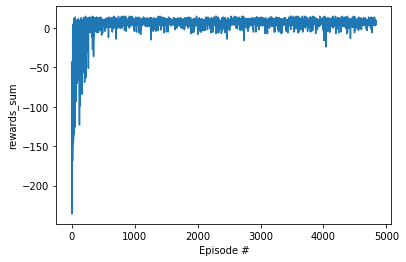

In [9]:
fig = plt.figure()
plt.plot(np.arange(1, len(rewards_sum)+1), rewards_sum)
plt.ylabel('rewards_sum')
plt.xlabel('Episode #')
plt.show()

Plotting the sum of rewards per episode shows that in the initial episodes , the rewards were negative and it has gradually increased

##### What are the states, the actions and the size of the Q-table?

- The state space is 500 as we have 25 different positions for the taxi, 4 different destinations and 5 passenger locations and hence 25*5*4= 500 observations space
- And there are 6 different actions 
1. move south
2. move north
3. move west
4. move east
5. pickup
6. drop off
So the size of qtable is 500*6


In [10]:
print(np.shape(qtable))

(500, 6)


##### What are the rewards? Why did you choose them?

Rewards are as chosen as follows
- +20 points for successfull drop-off, as we need a high positive reward for this behaviour as it is highly desired
- -10 points penalty for illegal pickup or drop off
- And a slight negative reward for each time step as we need the agent to reach the destination as fast as possible, so -1

##### How did you choose alpha and gamma in the following equation?
Try at least one additional value for alpha and gamma. How did it change the baseline performance?

- alpha is the learning rate, values ranging from 0-1. It has to gradually decrease as the number of iterations increase and agents learns 
- gamma is the discount factor, which determines the importance given to the future rewards. It ranges from 0-1
Lets try with following values and see its impact on the score

In [15]:
# new values for alpha and gamma 
#gamma = 0.9
#learning_rate(alpha) = 0.3

#QLearning(env, alpha, gamma, epsilon, min_epsilon, max_epsilon, decay_rate, max_steps, total_episodes)
rewards_sum=QLearning(env,0.5,0.9,1.0,0.01,1.0,0.01,99,5000)

Episode 100 Average Reward: -77.02702702702703
Episode 200 Average Reward: -9.44
Episode 300 Average Reward: 1.12
Episode 400 Average Reward: 4.83
Episode 500 Average Reward: 6.0
Episode 600 Average Reward: 7.04
Episode 700 Average Reward: 7.92
Episode 800 Average Reward: 7.56
Episode 900 Average Reward: 6.97
Episode 1000 Average Reward: 7.73
Episode 1100 Average Reward: 7.15
Episode 1200 Average Reward: 6.92
Episode 1300 Average Reward: 7.06
Episode 1400 Average Reward: 7.91
Episode 1500 Average Reward: 7.86
Episode 1600 Average Reward: 7.54
Episode 1700 Average Reward: 8.05
Episode 1800 Average Reward: 7.96
Episode 1900 Average Reward: 7.23
Episode 2000 Average Reward: 7.12
Episode 2100 Average Reward: 7.25
Episode 2200 Average Reward: 7.26
Episode 2300 Average Reward: 8.26
Episode 2400 Average Reward: 7.06
Episode 2500 Average Reward: 7.81
Episode 2600 Average Reward: 7.69
Episode 2700 Average Reward: 7.0
Episode 2800 Average Reward: 7.75
Episode 2900 Average Reward: 7.87
Episode 30

We can infer that the score has improved by reducing the learning rate and increased the gamma as the agent has learnt many times and gradually its performance improves so we can reduce the learning rate

The Score has improved from 5.1 to 5.6, i.e a 9.8% increase from the baseline model

##### Try a policy other than maxQ(s', a'). How did it change the baseline performance?

Lets try to take minimum instead of max qvalue policy 

In [16]:
def QLearning_new(env, learning_rate, gamma, epsilon, min_epsilon, max_epsilon, decay_rate, max_steps, total_episodes):
    # List of rewards 
    rewards = []
    rewards_copy = []
    average_rewards = []
    steps = []
    std_dev = np.std(qtable,axis=1)
    # Until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0

        for step in range(max_steps):
            # randomize a number for the exploration-exploitation trade-off
            exp_exp_tradeoff = random.uniform(0, 1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else exploration (random choice of action)
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Updating the Qvalue of current state-action pair using the bellman equation
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.min(qtable[new_state, :]) - qtable[state, action])

            # Our new state is state
            state = new_state

            # Update rewards
            total_rewards += reward

            if done:
                steps.append(step)
                rewards.append(total_rewards)
                rewards_copy.append(total_rewards)
                #print ("Score", total_rewards)
                break
            state = new_state

        # Reduce epsilon 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 

        if (episode+1) % 100 == 0:
                average_reward = np.mean(rewards)
                average_rewards.append(average_reward)
                rewards = []

        if (episode+1) % 100 == 0:    
                print('Episode {} Average Reward: {}'.format(episode+1, average_reward))

    env.close()
    print ("Score over time: " +  str(sum(rewards_copy)/total_episodes))
    print("Average number of steps per episode: " +str(sum(steps)/total_episodes) )
    return rewards_copy

In [17]:
#QLearning_new(env, alpha, gamma, epsilon, min_epsilon, max_epsilon, decay_rate, max_steps, total_episodes) for trying a policy other than maxQvalue
rewards_sum_new=QLearning_new(env,0.7,0.8,1.0,0.01,1.0,0.01,99,5000)

Episode 100 Average Reward: -150.14285714285714
Episode 200 Average Reward: -81.11111111111111
Episode 300 Average Reward: -58.827586206896555
Episode 400 Average Reward: -25.444444444444443
Episode 500 Average Reward: -7.25
Episode 600 Average Reward: -9.26086956521739
Episode 700 Average Reward: -6.611111111111111
Episode 800 Average Reward: -7.862068965517241
Episode 900 Average Reward: -2.4857142857142858
Episode 1000 Average Reward: 5.0
Episode 1100 Average Reward: 0.7586206896551724
Episode 1200 Average Reward: -2.6666666666666665
Episode 1300 Average Reward: -2.0526315789473686
Episode 1400 Average Reward: -0.9473684210526315
Episode 1500 Average Reward: -1.619047619047619
Episode 1600 Average Reward: 5.5476190476190474
Episode 1700 Average Reward: 3.7346938775510203
Episode 1800 Average Reward: 5.28
Episode 1900 Average Reward: 3.5172413793103448
Episode 2000 Average Reward: -2.489795918367347
Episode 2100 Average Reward: 4.9655172413793105
Episode 2200 Average Reward: 0.039215

So it is clear that by taking the min policy, we have not achieved good results. The average rewards are not imporving consistently and the score has also reduced drastically.

- Instead of maxargs, lets try to take the average

In [18]:
std_dev = np.std(qtable,axis=1)
np.shape(std_dev)
#x=np.min(np.std(qtable,axis=1))
#x

(500,)

In [19]:
def QLearning_new(env, learning_rate, gamma, epsilon, min_epsilon, max_epsilon, decay_rate, max_steps, total_episodes):
    # List of rewards 
    rewards = []
    rewards_copy = []
    average_rewards = []
    steps = []
    std_dev = np.std(qtable,axis=1)
    # Until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0

        for step in range(max_steps):
            # randomize a number for the exploration-exploitation trade-off
            exp_exp_tradeoff = random.uniform(0, 1)

            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else exploration (random choice of action)
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Updating the Qvalue of current state-action pair using the bellman equation
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.mean(qtable[new_state, :]) - qtable[state, action])

            # Our new state is state
            state = new_state

            # Update rewards
            total_rewards += reward

            if done:
                steps.append(step)
                rewards.append(total_rewards)
                rewards_copy.append(total_rewards)
                #print ("Score", total_rewards)
                break
            state = new_state

        # Reduce epsilon 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 

        if (episode+1) % 100 == 0:
                average_reward = np.mean(rewards)
                average_rewards.append(average_reward)
                rewards = []

        if (episode+1) % 100 == 0:    
                print('Episode {} Average Reward: {}'.format(episode+1, average_reward))

    env.close()
    print ("Score over time: " +  str(sum(rewards_copy)/total_episodes))
    print("Average number of steps per episode: " +str(sum(steps)/total_episodes) )
    return rewards_copy

In [20]:
#QLearning_new(env, alpha, gamma, epsilon, min_epsilon, max_epsilon, decay_rate, max_steps, total_episodes) for trying a policy other than maxQvalue
rewards_sum_new=QLearning_new(env,0.7,0.8,1.0,0.01,1.0,0.01,99,5000)

Episode 100 Average Reward: -114.67857142857143
Episode 200 Average Reward: -59.36842105263158
Episode 300 Average Reward: -22.916666666666668
Episode 400 Average Reward: -4.714285714285714
Episode 500 Average Reward: -6.5
Episode 600 Average Reward: -6.888888888888889
Episode 700 Average Reward: 2.857142857142857
Episode 800 Average Reward: 9.0
Episode 900 Average Reward: 2.3333333333333335
Episode 1000 Average Reward: -0.6666666666666666
Episode 1100 Average Reward: -2.1
Episode 1200 Average Reward: -5.75
Episode 1300 Average Reward: -7.333333333333333
Episode 1400 Average Reward: -4.4
Episode 1500 Average Reward: -2.75
Episode 1600 Average Reward: 4.2727272727272725
Episode 1700 Average Reward: -1.0
Episode 1800 Average Reward: -4.666666666666667
Episode 1900 Average Reward: -6.666666666666667
Episode 2000 Average Reward: 1.3333333333333333
Episode 2100 Average Reward: 5.714285714285714
Episode 2200 Average Reward: 10.5
Episode 2300 Average Reward: -8.714285714285714
Episode 2400 Av

##### How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode?

Initally as the agent has to explore the environment, have chosen the epsilon to be 1.0 and as the agent starts exploring and learning, so that qvalues are updated, we can then exploit.
We choose a decay rate to decay the epsilon value to achieve the exploration-exploitation trade off.

In [21]:
# Trying out the following values for epsilon and decay rate on top of baseline model
# epsilon = 0.5, decay rate =0.05
#QLearning(env, alpha, gamma, epsilon, min_epsilon, max_epsilon, decay_rate, max_steps, total_episodes)
rewards_sum=QLearning(env,0.7,0.8,0.5,0.01,1.0,0.04,99,5000)

Episode 100 Average Reward: -81.11111111111111
Episode 200 Average Reward: -54.0
Episode 300 Average Reward: 10.0


/Users/harika/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/harika/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 400 Average Reward: nan
Episode 500 Average Reward: nan
Episode 600 Average Reward: nan
Episode 700 Average Reward: -0.3333333333333333
Episode 800 Average Reward: -7.5
Episode 900 Average Reward: -5.2
Episode 1000 Average Reward: nan
Episode 1100 Average Reward: 10.0
Episode 1200 Average Reward: 8.75
Episode 1300 Average Reward: 10.5
Episode 1400 Average Reward: 12.0
Episode 1500 Average Reward: -3.3333333333333335
Episode 1600 Average Reward: 8.0
Episode 1700 Average Reward: 6.5
Episode 1800 Average Reward: 9.25
Episode 1900 Average Reward: -6.4
Episode 2000 Average Reward: 8.333333333333334
Episode 2100 Average Reward: 12.0
Episode 2200 Average Reward: 5.4
Episode 2300 Average Reward: -10.333333333333334
Episode 2400 Average Reward: 7.714285714285714
Episode 2500 Average Reward: 7.571428571428571
Episode 2600 Average Reward: 7.0
Episode 2700 Average Reward: 6.2
Episode 2800 Average Reward: 9.5
Episode 2900 Average Reward: 5.857142857142857
Episode 3000 Average Reward: 6.0
Ep

So by reducing the epsilon, we have reduced our score overall as we have not allowed for good exploration for the agent initially

##### What is the average number of steps taken per episode?

In [22]:
# Calculating based on the baseline model
rewards_sum=QLearning(env,0.7,0.8,1.0,0.01,1.0,0.01,99,5000)

Episode 100 Average Reward: -100.87096774193549
Episode 200 Average Reward: -40.1764705882353
Episode 300 Average Reward: -11.114285714285714
Episode 400 Average Reward: 2.64
Episode 500 Average Reward: 2.0277777777777777
Episode 600 Average Reward: 4.297297297297297
Episode 700 Average Reward: 8.882352941176471
Episode 800 Average Reward: 6.45
Episode 900 Average Reward: 7.923076923076923
Episode 1000 Average Reward: 8.428571428571429
Episode 1100 Average Reward: 4.972222222222222
Episode 1200 Average Reward: 7.764705882352941
Episode 1300 Average Reward: 6.956521739130435
Episode 1400 Average Reward: 8.186046511627907
Episode 1500 Average Reward: 7.551020408163265
Episode 1600 Average Reward: 7.5813953488372094
Episode 1700 Average Reward: 7.5
Episode 1800 Average Reward: 8.89655172413793
Episode 1900 Average Reward: 7.666666666666667
Episode 2000 Average Reward: 7.394736842105263
Episode 2100 Average Reward: 8.745098039215685
Episode 2200 Average Reward: 7.659090909090909
Episode 23

So on an average the agent takes approximately 5.4 steps per episode

##### Does Q-learning use value-based or policy-based iteration?

Q learning uses value based iteration as here our goal is to find the optimal state value function, i.e we try to find the approximate optimum q value function. The next action from a given state is chosen based on the values from the qtable.

##### What is meant by expected lifetime value in the Bellman equation?

Bellman equation expresses the relationship between value of a state and values of its successor states, showing that value of a state under a policy pi, is the sum of its expected return(discounted value of the next state) plus the rewards along its way. 
So the expected lifetime value is the path that can be taken from an intial state following the maximum state-action value pairs(to get the maximum expected return), once an opotimal policy is reached and there after.

<img src="images/Bellman.png" alt="title">

## Conclusion

We have used Qlearning algorithm to determine the best path to be taken by a taxi to pick up a passenger and drop-off at one of the destinations as fast as possible.
- We tuned the parameters, alpha(Learning rate), gamma(discount factor), epsilon, decay rate and the policy used to alter the agent's performance.
- In this particular game, we have used the score to evaluate the agent's performance over time

## License 

Copyright 2020 Harika Reddy Gurram

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.